In [ ]:
cimport numpy as np 
import pandas as pd
import math

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords
stop_words=stopwords.words('english')

In [ ]:
docs =['data members be the data components of a particular class a member function be the function components of the class',
 'a field variable be a variable that be declare as a member of a class a local variable be variable that be declare local to a method',
 'data members be declare inside the class but outside of any member function unlike with local variables each object of the class keep its own copy of the data members store in memory',
 'data member be variables that represent an attribute in a class definition local variables declare in a function body cannot be use outside of that function body when a function terminate the value of its local variables be lose',
 'a local variable cannot be access outside the function in which it be declare data members normally be private variables of function declare private be accessible only to member function of the class in which they be declare',
 'a data member be part of a c class or structure that store data of a certain type a local variable inside a member function be only available inside that function and can be use to derive a desire outcome',
 'a local variable can only be access within the scope of its declaration',
 'data members be the tributes of the function and can be use outside the function local variable can not be use outside the function and the value be lose after the function terminate',
 'data members be permanent attribute of the class local variables inside a member function be lose when the scope of the member function end',
 'data members be declare in a class definition but outside the body of a class s member function definitions local variables be declare in a function definition s body',
 'a data member be globally accessible while a local variable be only accessible inside the member function',
 'a variable inside a member function can only be access inside that member and a data member can be access through ought the program',
 'local variables be use only within the scope of its declaration',
 'a data member be a more general term describe all object instantiate within a member function local in local variables refer more to the scope of a variable which may be locate in anything from a control structure to a class local variables whose scope be in a member function be the same as data members of member function',
 'a data member exist permanently in that program s memory as long as it be run a local variable inside a member function be temporal and only use to operate in the function and exist as long as the function be run',
 'local variables can only be use within the function where as data members can be set to public access and can be use throughout',
 'the local variable be lose once it exit the block of code while the data member be not',
 'every member function can access and modify a data member a local variable can only be use from the line of declaration to the next close e before it be lose from memory',
 'data member be accessible to all function in the class where local variable be only available to the member function and value be lose when function close',
 'data members be variables that be declare inside the class definition but outside of the body of the class member function local variables can only be use within the function declaration',
 'the data member can be access outside of the class whereas the local variable cannot',
 'local variables cannot be use outside of that function body when a function terminate the value of its local variables be lose where as data members be variables in a class definition and they exist throughout the life of the object',
 'a local variable in a member function have to be static a data member can change its value freely',
 'a local variable be only usable within the function it be define whereas a data member be available to any method within its class',
 'variable declare in a function definition s body cannot be use outside of that function data members accessible only to member function of that class',
 'data members local variables be declare in a function definition s body they cannot be use outside of that function body when a function terminate the value of its local variables be lose',
 'local variable be only available in the function',
 'local variables be access inside member function only while data members can be access throughout the class',
 'a data member be accessible anywhere in the class while i local variable in a member function be only accessible in that particular function and be free after the function exit',
 'a data member be encapsulate within a class or object it be static and can be share by all instance of that class however local variable s be only use from the function or block in which it be declare and not the whole class other wise they would be call global variables']
q = ['data members can be access from any member function inside the class definition local variables can only be access inside the member function that define them']

In [ ]:
docs.extend(q)

In [ ]:
def remStopWords(docs):
  clean_doc=[]
  for doc in docs:
    clean_doc.append(' '.join([word for word in doc.split() if word not in stop_words]))
  return clean_doc

In [ ]:
docs=remStopWords(docs)
docs=eval(str(docs).lower())
q=eval(str(q).lower())

In [ ]:
docs

['data members be the data components of a particular class a member function be the function components of the class',
 'a field variable be a variable that be declare as a member of a class a local variable be variable that be declare local to a method',
 'data members be declare inside the class but outside of any member function unlike with local variables each object of the class keep its own copy of the data members store in memory',
 'data member be variables that represent an attribute in a class definition local variables declare in a function body cannot be use outside of that function body when a function terminate the value of its local variables be lose',
 'a local variable cannot be access outside the function in which it be declare data members normally be private variables of function declare private be accessible only to member function of the class in which they be declare',
 'a data member be part of a c class or structure that store data of a certain type a local va

In [ ]:
def get_vocab(docs):
  voc={}
  for doc in docs:
    for word in doc.split():
      if word not in voc:
        voc[word]=1
      else:
        voc[word]+=1
  return voc

In [ ]:
def get_dict(docs):
  d=[]
  for doc in docs:
    dict={}
    for w in doc.split():
      #print(w)
      if w not in dict:
        dict[w]=1
      else:
        dict[w]+=1
    d.append(dict)
  return d

In [ ]:
def tf_dframe(docs,terms):
  dict=get_dict(docs)
  df=pd.DataFrame(data=0, index=np.arange(0, len(docs)), columns=terms) 
  #df=get_tf(docs,df,dict,terms)
  for i in range(len(docs)):
    for term in terms:
      #print(term)
      if term in docs[i].split():
        df.loc[i,term]=dict[i][term]#/len(docs[i].split())
        #df = df.astype(float) 
  return df.T

In [ ]:
def get_DFt(docs,terms):
  dft={}
  for doc in docs:
    for term in terms:
      if term in doc.split():
        if term not in dft:
          dft[term]=1
        else:
          dft[term]+=1
  return dft

In [ ]:
def get_idf(docs,terms):
  dft=get_DFt(docs,terms)
  print(dft)
  N=len(docs)
  for key,values in dft.items():
    dft[key]=math.log10(N/float(values))
  return dft

In [ ]:
def computeTF(term,)

In [ ]:
def tf_idf(docs):
  voc=get_vocab(docs)
  terms=sorted(voc.keys())
  #print(terms)
  #df=tf_dframe(docs,terms)
  #print(df.T)
  idf=get_idf(docs,terms)
  print(idf)
  dict=get_dict(docs)
  #print(dict)
  tf_idf=pd.DataFrame(data=0, index=np.arange(0, len(docs)), columns=terms)
  for i in range(len(docs)):
    for term in terms:
      if term in docs[i].split():
        #print(i ,term)
        tf_idf.loc[i,term]=(dict[i][term]/len(docs[i].split()))*idf[term]
  return tf_idf.T

In [ ]:
  voc=get_vocab(docs)
  terms=sorted(voc.keys())
  print(terms)
  len(terms)

['account', 'actual', 'actually', 'address', 'allow', 'also', 'application', 'approach', 'arise', 'bank', 'base', 'basic', 'basics', 'begin', 'behavior', 'behaviors', 'book', 'break', 'bug', 'certain', 'challenge', 'change', 'check', 'client', 'clients', 'code', 'collect', 'company', 'complete', 'concept', 'costumer', 'create', 'creation', 'data', 'define', 'design', 'desire', 'detail', 'develop', 'development', 'discussion', 'early', 'ease', 'easy', 'effective', 'effort', 'employ', 'enable', 'encounter', 'end', 'enhance', 'entire', 'error', 'errors', 'estimations', 'evaluate', 'example', 'expand', 'extensively', 'feasible', 'feedback', 'final', 'finalize', 'find', 'finer', 'finish', 'first', 'foresight', 'function', 'general', 'generate', 'get', 'give', 'groundwork', 'help', 'high', 'idea', 'illustrate', 'improve', 'include', 'intense', 'introduce', 'issue', 'job', 'key', 'lay', 'leave', 'let', 'level', 'like', 'limit', 'look', 'main', 'major', 'make', 'may', 'mean', 'meet', 'minimal'

167

In [ ]:
df=tf_idf(docs)

{'integer': 1, 'program': 12, 'string': 1, 'variable': 12, 'assign': 1, 'data': 6, 'finish': 1, 'hold': 5, 'name': 5, 'new': 1, 'programmer': 2, 'structure': 1, 'uniquely': 1, 'value': 21, 'location': 17, 'memory': 20, 'store': 19, 'computer': 5, 'later': 3, 'retrieve': 2, 'size': 1, 'type': 3, 'use': 10, 'letter': 2, 'numerical': 1, 'object': 4, 'example': 2, 'give': 1, 'number': 2, 'refer': 1, 'stand': 2, 'symbol': 3, 'computers': 2, 'identifier': 2, 'block': 1, 'specific': 2, 'assume': 1, 'set': 1, 'word': 2, 'pointer': 1, 'address': 1, 'change': 3, 'definition': 1, 'fix': 1, 'mathematical': 1, 'perspective': 1, 'represent': 1, 'act': 1, 'directly': 1, 'recall': 1, 'subject': 1, 'depend': 1, 'may': 1, '1': 1, '2': 1, '24': 1, '256': 1, '3': 1, '4': 1, '5': 1, '55': 1, '6': 1, '657': 1, '68': 1, '72': 1, '8': 1, '8123': 1, 'b': 1, 'c': 1, 'char': 1, 'e': 1, 'et': 1, 'etc': 2, 'f': 1, 'float': 1, 'information': 1, 'int': 1, 'p': 1, 'placeholder': 1, 'different': 1, 'way': 1, 'access':

In [ ]:
df

In [ ]:
A=np.array(df)

In [ ]:
A[:,-1]

**SVD Code**

In [ ]:
f=len(docs)-1

In [ ]:
f

30

In [ ]:
A=tf_dframe(docs,terms)
print(A)
A=np.array(A)
#A[:,:f]

        0   1   2   3   4   5   6   7   8   ...  21  22  23  24  25  26  27  28  29
0        1   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
1        0   0   0   0   0   0   0   0   0  ...   0   0   1   0   0   0   0   0   0
a        0   1   2   3   1   2   3   2   0  ...   0   2   2   3   0   2   2   4   1
after    0   1   0   1   0   0   0   0   0  ...   0   0   0   0   0   0   1   0   0
again    0   1   0   0   0   1   1   0   0  ...   0   0   0   1   0   0   0   0   0
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..
while    1   3   4   6   2   2   4   2   2  ...   2   2   2   3   0   2   3   4   1
will     0   0   0   0   2   2   5   0   1  ...   0   2   0   0   0   1   0   0   1
with     0   0   0   0   1   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
within   0   1   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   1   2   0
would    0   0   0   0   0   0   0   0   0  ...   0   0   1   2   0   0   0 

In [ ]:
A.shape

(167, 30)

In [ ]:
# Singular-value decomposition
from numpy import array
from numpy import diag
from numpy import dot
from numpy import zeros
from scipy.linalg import svd
import scipy
from scipy.spatial import distance
from sklearn import metrics

In [ ]:
# define a matrix
print("A=",A[:,:f])
# SVD
U, S, VT = svd(A[:,:f])
print("U=",U)
print("S=Sigma=",S)
print("VT=",VT)
V=VT.T
print("V=",V)

In [ ]:
#Rank 2 Approxmation.
#Taking first 2 columns of U and V.

In [ ]:
#Keep first 2 columns and rows of S

In [ ]:
#V holds vectors of 3 documents

In [ ]:
# q=QT*U*S^-1

In [ ]:
def SInverse(S):
  for i in range(len(S)):
    for j in range(len(S[i])):
      if i==j:
        S[i,j]=1/S[i,j]
  return S

In [ ]:
Si=SInverse(S)

In [ ]:
q= QT.dot(U.dot(Si))

In [ ]:
link5 = 'https://drive.google.com/open?id=1G8RyYf9oUboEdsZMxvjw7RqltyfsFmJY'
fluff, id5 = link5.split('=')
print (id5) # 
downloaded = drive.CreateFile({'id':id5}) 
downloaded.GetContentFile('ave2.2.txt')  
ave = open("ave2.2.txt", "r")

1G8RyYf9oUboEdsZMxvjw7RqltyfsFmJY


In [ ]:
avg_scores=[]
line = ave.readline()
while line:
    avg_scores.append(line.strip())
    line = ave.readline()

In [ ]:
avg_scores=np.array(avg_scores)
avg_scores=avg_scores.astype('float')

In [ ]:
avg_scores

array([3. , 2.5, 4.5, 4.5, 5. , 4.5, 3.5, 4.5, 4. , 4. , 4.5, 5. , 4.5,
       2. , 3.5, 5. , 4.5, 4.5, 5. , 4.5, 4. , 5. , 2. , 5. , 5. , 4.5,
       4.5, 4.5, 5. , 4. ])

In [ ]:
from sklearn import metrics
print(metrics.mean_absolute_error(r,avg_scores))
print(metrics.mean_squared_error(r,avg_scores))

In [ ]:
dst=[]
for vec in V:
  euclid=1-distance.euclidean(vec,q)
  dst.append(euclid*5)

In [ ]:

print(metrics.mean_absolute_error(dst,avg_scores))
print(metrics.mean_squared_error(dst,avg_scores))

0.745622131525623
0.8868847576880313


In [ ]:
voc=get_vocab(docs)
terms=sorted(voc.keys())
A=tf_idf(docs)
#A=tf_dframe(docs,terms)
A=np.array(A)
A.shape

{'a': 20, 'be': 31, 'class': 19, 'components': 1, 'data': 27, 'function': 26, 'member': 24, 'members': 14, 'of': 20, 'particular': 2, 'the': 27, 'as': 5, 'declare': 9, 'field': 1, 'local': 28, 'method': 2, 'that': 12, 'to': 11, 'variable': 19, 'any': 3, 'but': 3, 'copy': 1, 'each': 1, 'in': 14, 'inside': 9, 'its': 8, 'keep': 1, 'memory': 3, 'object': 4, 'outside': 10, 'own': 1, 'store': 2, 'unlike': 1, 'variables': 14, 'with': 1, 'an': 1, 'attribute': 2, 'body': 6, 'cannot': 6, 'definition': 7, 'lose': 8, 'represent': 1, 'terminate': 4, 'use': 12, 'value': 6, 'when': 5, 'access': 8, 'accessible': 5, 'it': 6, 'normally': 1, 'only': 18, 'private': 1, 'they': 4, 'which': 3, 'and': 10, 'available': 4, 'c': 1, 'can': 12, 'certain': 1, 'derive': 1, 'desire': 1, 'or': 2, 'outcome': 1, 'part': 1, 'structure': 2, 'type': 1, 'declaration': 4, 'scope': 4, 'within': 7, 'after': 2, 'not': 3, 'tributes': 1, 'end': 1, 'permanent': 1, 'definitions': 1, 's': 5, 'globally': 1, 'while': 4, 'ought': 1, 'p

(139, 31)

In [ ]:
f=len(docs)-1

In [ ]:
n_dim=1

In [ ]:
    U, S, VT = svd(A[:,:f])
    V=VT.T
    S=diag(S)
    U=U[:,:n_dim]
    V=V[:,:n_dim]
    S=S[:n_dim,:n_dim]
    QT=A[:,-1]
    QT=np.array(QT)
    Si=SInverse(S)
    q= QT.dot(U.dot(Si))
    cos=[]
    for vec in V:
      dst=1- scipy.spatial.distance.cosine(vec,q)
      cos.append(dst*5)
    euclid=[]
    for vec in V:
      dst=1-distance.euclidean(vec,q)
      euclid.append(dst*5)

In [ ]:
cos

[5.0,
 5.0,
 5.000000000000001,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.000000000000001,
 5.000000000000001,
 5.000000000000001,
 4.999999999999999,
 5.000000000000001,
 5.000000000000001,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.000000000000001,
 5.0,
 5.0]

In [ ]:
euclid

[4.797019500900653,
 4.665371848453943,
 4.965467447587873,
 4.592344575163892,
 4.7783712174540725,
 4.949942111526005,
 4.218154367601948,
 4.883995885484474,
 4.963563719046157,
 4.915964435491066,
 4.672610003721244,
 4.7103130505346975,
 4.254055615504314,
 4.249605459634393,
 4.954711346680597,
 4.581990020733439,
 4.380638085214756,
 4.714863093903384,
 4.939315052308884,
 4.859233356754354,
 4.492744987393227,
 4.855222764892339,
 4.6324216985013855,
 4.627928111564984,
 4.95788185209708,
 4.798128426689779,
 4.325500326530449,
 4.698582883781274,
 4.96066677211378,
 4.921867374661007]

In [ ]:
len(A[0])

31

In [ ]:
def testDim(bow_A):
  f=len(docs)-1
  error=[]
  absErr_cos=[]
  sqrErr_cos=[]
  absErr_euclid=[]
  sqrErr_euclid=[]
  #print("A=",A[:,:f])
  for n_dim in range(1,f+1):
    #print("n_dim=",n_dim)
    U, S, VT = svd(A[:,:f])
    V=VT.T
    S=diag(S)
    U=U[:,:n_dim]
    V=V[:,:n_dim]
    S=S[:n_dim,:n_dim]
    QT=A[:,-1]
    QT=np.array(QT)
    Si=SInverse(S)
    q= QT.dot(U.dot(Si))
    cos=[]
    for vec in V:
      dst=1- scipy.spatial.distance.cosine(vec,q)
      cos.append(dst*5)
    absErr_cos.append([n_dim,metrics.mean_absolute_error(cos,avg_scores)])
    sqrErr_cos.append([n_dim,metrics.mean_squared_error(cos,avg_scores)])
    euclid=[]
    for vec in V:
      dst=1-distance.euclidean(vec,q)
      euclid.append(dst*5)
    absErr_euclid.append([n_dim,metrics.mean_absolute_error(euclid,avg_scores)])
    sqrErr_euclid.append([n_dim,metrics.mean_squared_error(euclid,avg_scores)])
  error.append(["absolute in Cosine",absErr_cos])
  error.append(["squared in Cosine",sqrErr_cos])
  error.append(["absolute in Euclidean",absErr_euclid])
  error.append(["squared in Euclidean",sqrErr_euclid])
  return error

In [ ]:
err=testDim(A)

In [ ]:
err

[['absolute in Cosine',
  [[1, 0.7833333333333335],
   [2, 0.9009958409956614],
   [3, 1.1321183518530735],
   [4, 1.7755548879902974],
   [5, 2.2587068496122127],
   [6, 2.3610722824762815],
   [7, 2.5449500036908628],
   [8, 2.812079606111887],
   [9, 3.008828789388978],
   [10, 3.1581539632962774],
   [11, 3.3218449513600303],
   [12, 3.429936515779764],
   [13, 3.4823129197730767],
   [14, 3.5504923843840386],
   [15, 3.567974401900822],
   [16, 3.588158541059405],
   [17, 3.6001695187201443],
   [18, 3.6178967431842155],
   [19, 3.6713712155020364],
   [20, 3.700281484320717],
   [21, 3.7828976236884113],
   [22, 3.8039183916105936],
   [23, 3.8881013502383963],
   [24, 3.876768448875089],
   [25, 3.8857806619264954],
   [26, 3.903854330982908],
   [27, 3.9184298201099472],
   [28, 3.9465139919402743],
   [29, 4.017318197859362],
   [30, 4.048264072058002]]],
 ['squared in Cosine',
  [[1, 1.3250000000000004],
   [2, 1.8071456752299193],
   [3, 2.1765443947741243],
   [4, 4.7868925

In [ ]:
err[0]

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
#Error Analysis Using Graph 

In [ ]:
#1.Cosine Distance With Absolute Error

In [ ]:
absErr_cos=np.array(err[0][1])
absErr_cos

In [ ]:
absErr_cos[:,1]

In [ ]:
x1 =absErr_cos[:,0]
y1 =absErr_cos[:,1]

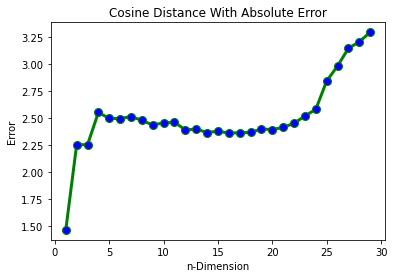

In [ ]:
plt.plot(x1, y1,color='green', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=8)
plt.xlabel('n-Dimension')
plt.ylabel('Error')
plt.title('Cosine Distance With Absolute Error')
plt.show()

In [ ]:
#2.Cosine Distance With Squared Error

In [ ]:
sqrErr_cos=np.array(err[1][1])
sqrErr_cos

In [ ]:
absErr_cos[:,1]

array([1.46551724, 2.25482786, 2.25511413, 2.55435582, 2.49798465,
       2.49672589, 2.51584571, 2.48026377, 2.43738143, 2.45756166,
       2.46351631, 2.39165575, 2.3998657 , 2.36735368, 2.38069691,
       2.36180755, 2.36644455, 2.36885678, 2.39981947, 2.39560006,
       2.4147644 , 2.45441677, 2.52071574, 2.58293368, 2.84482759,
       2.98430101, 3.14776484, 3.20842545, 3.29692786])

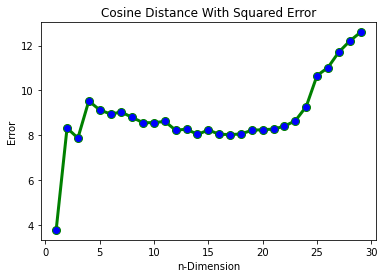

In [ ]:
x1 =sqrErr_cos[:,0]
y1 =sqrErr_cos[:,1]
plt.plot(x1, y1,color='green', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=8)
plt.xlabel('n-Dimension')
plt.ylabel('Error')
plt.title('Cosine Distance With Squared Error')
plt.show()

In [ ]:
#3.Euclidean Distance With Absolute Error

In [ ]:
absErr_euclid=np.array(err[2][1])
absErr_euclid

In [ ]:
absErr_euclid[:,0]

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29.])

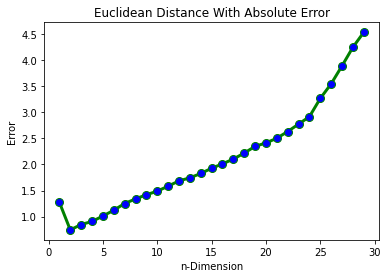

In [ ]:
x1 =absErr_euclid[:,0]
y1 =absErr_euclid[:,1]
plt.plot(x1, y1,color='green', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=8)
plt.xlabel('n-Dimension')
plt.ylabel('Error')
plt.title('Euclidean Distance With Absolute Error')
plt.show()

In [ ]:
#4.Euclidean Distance With Squared Error

In [ ]:
sqrErr_euclid=np.array(err[3][1])
sqrErr_euclid

In [ ]:
sqrErr_euclid[:,1]

array([ 2.69015046,  0.88688476,  1.13172268,  1.55519826,  1.95585089,
        2.39965391,  2.9672544 ,  3.42275029,  4.03602118,  4.64351913,
        5.04217092,  5.39802112,  5.68276446,  6.02913945,  6.36699042,
        6.75334528,  6.99917961,  7.48012691,  8.07217815,  8.42300996,
        9.0670098 ,  9.48160273, 10.17027376, 11.35884824, 13.45984672,
       14.44610039, 16.61719493, 19.69782633, 22.10393492])

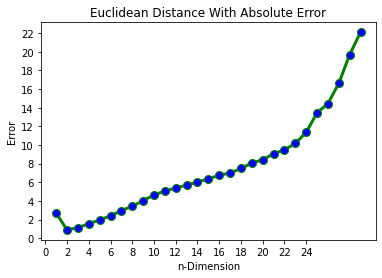

In [ ]:
x1 =sqrErr_euclid[:,0]
y1 =sqrErr_euclid[:,1]
plt.yticks(np.arange(0, 30, 2))
plt.xticks(np.arange(0, 25, 2))
plt.plot(x1, y1,color='green', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=8)
plt.xlabel('n-Dimension')
plt.ylabel('Error')
plt.title('Euclidean Distance With Absolute Error')
plt.show()

In [ ]:
#Finding Best Dimension

In [ ]:
A.shape

(88, 30)

In [ ]:
A[:2,:].shape

(2, 30)

In [ ]:
def Frobenius_norm(A,B):
  s=0
  for i in range(len(A)):
    for j in range(len(A[i])):
      d=math.pow((A[i][j]-B[i][j]),2)
      s+=d
  return math.sqrt(s)

In [ ]:
m1=np.array([
	[1,2,3,4,5,6,7,8,9,10],
	[11,12,13,14,15,16,17,18,19,20],
	[21,22,23,24,25,26,27,28,29,30]])

In [ ]:
m2=np.array([
	[1,2,3,4,5,6,7,8,9,10],
	[11,12,13,14,15,16,17,18,19,20],
	[21,22,23,24,25,26,27,28,29,30]])

In [ ]:
s=la.norm(m1-m2)
s

0.0

In [ ]:
m1[].shape

(10,)

In [ ]:
voc=get_vocab(docs)
terms=sorted(voc.keys())
#A=tf_idf(docs)
A=tf_dframe(docs,terms)
A=np.array(A)
A.shape

(167, 30)

In [ ]:
la = np.linalg

In [ ]:
f=len(docs)-1
diff=[]
#print("A=",A[:,:f])
print(A.shape)
for n_dim in range(1,f+1):
  #print("n_dim=",n_dim)
  U, S, VT = svd(A[:,:f])
  S=diag(S)
  U=U[:,:n_dim]
  VT=VT[:n_dim,:]
  S=S[:n_dim,:n_dim]
  B = U.dot(S.dot(VT))
  print(B)
  norm=la.norm(A[:,:f]-B)
  diff.append([n_dim,norm])

In [ ]:
diff

In [ ]:
f

29

In [ ]:
len(A[0])

30

In [ ]:
len(A[:,-1])

167

In [ ]:
voc=get_vocab(docs)
terms=sorted(voc.keys())
#A=tf_idf(docs)
A=tf_dframe(docs,terms)
A=np.array(A.T)
A.shape

(30, 210)

In [ ]:
D=np.array([[1,0,1,0,0,0],[0,1,0,0,0,0],[1,1,0,0,0,0],[1,0,0,1,1,0],[0,0,0,1,0,1]])

In [ ]:
D

array([[1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 0, 1]])

In [ ]:
f=len(D)
f

5